In [11]:
import nltk
import os
import codecs
import argparse
import numpy as np
import string
import re
from pyvi import ViTokenizer
import gensim # In case you have difficulties installing gensim, you need to consider installing conda.
from gensim.models.callbacks import CallbackAny2Vec
import pickle as pickle


pattern = r'[' + string.punctuation +']'

In [12]:
epoch_losses = []

In [13]:
        
class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0
        self.losses = []

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        self.losses.append(loss_now)
        epoch_losses.append(loss_now)
        
        
def get_min_count(sents):
    '''
    Args:
      sents: A list of lists. E.g., [["I", "am", "a", "boy", "."], ["You", "are", "a", "girl", "."]]
     
    Returns:
      min_count: A uint. Should be set as the parameter value of word2vec `min_count`.   
    '''
    global vocab_size
    from itertools import chain
     
    fdist = nltk.FreqDist(chain.from_iterable(sents))
    min_count = fdist.most_common(vocab_size)[-1][1] # the count of the the top-kth word
    
    return min_count





Make sentences list

In [5]:
global lcode
print ("Making sentences as list...")
sents = []
with codecs.open('data/corpus/corpus-split-2.txt', 'r', 'utf-8-sig') as fin:
    while 1:
        line = fin.readline()
        line = re.sub(pattern, '', line)
        if not line: break

        words = ViTokenizer.tokenize(line)
        words = words.split()
        sents.append(words)
        
print ("Done making sentence list")

Making sentences as list...
Done making sentence list


In [4]:
# arguments setting 
lcode = "vi"
vector_size =300
window_size = 5
vocab_size = 30000
num_negative = 10
epochs = 15

In [6]:

print ("Making word vectors...")   

call_back = callback()

model = gensim.models.Word2Vec(update_sents, size=vector_size, min_count=100,
                               negative=num_negative, 
                               window=window_size,
                               max_final_vocab=vocab_size,
                               callbacks=[call_back],
                               compute_loss=True,
                               sg = 1,
                               workers = 6,
                               iter=epochs)

# Save vector to file
model.wv.save_word2vec_format('data/vectors-sg/{}-{}-{}-{}-{}-loss.vec'.format(lcode, vector_size, window_size, vocab_size, num_negative), binary=False)

# Save to file
#with codecs.open('data/vectors-sg/{}-{}-{}-{}-{}-fullsplit8-sg-token.tsv'.format(lcode, vector_size, window_size, vocab_size, num_negative), 'w', 'utf-8') as fout:
#    for i, word in enumerate(model.wv.index2word):
#        fout.write(u"{}{}\n".format(word.encode('utf8').decode('utf8'),
#                                          np.array_str(model[word])[1:-1]
#                                          ))
model.save('data/vectors-sg/{}-{}-{}-{}-{}-loss.model'.format(lcode, vector_size, window_size, vocab_size, num_negative))
print ("Done.")


Making word vectors...
Loss after epoch 0: 53596920.0
Loss after epoch 1: 18767952.0
Loss after epoch 2: 7172456.0
Loss after epoch 3: 7158064.0
Loss after epoch 4: 6871088.0
Loss after epoch 5: 6680176.0
Loss after epoch 6: 6565400.0
Loss after epoch 7: 6360264.0
Loss after epoch 8: 6124704.0
Loss after epoch 9: 5932944.0
Loss after epoch 10: 5674216.0
Loss after epoch 11: 3313544.0
Loss after epoch 12: 0.0
Loss after epoch 13: 0.0
Loss after epoch 14: 0.0
Done.


In [12]:
model.save('data/vectors-sg/{}-{}-{}-{}-{}-fullsplit8-sg-token-token.model'.format(lcode, vector_size, window_size, vocab_size, num_negative))

In [9]:
print ("Making word vectors...")   

call_back = callback()

test_model1 = gensim.models.Word2Vec(min_count = 300,
                                    negative = 0,
                                    window = 5,
                                    compute_loss=True,
                                    sg = 1,
                                    workers = 6,)
test_model1.build_vocab(sents)

test_model1.train(sents,
                 total_examples = test_model.corpus_count,
                 epochs = 10,
                 compute_loss = True,
                 callbacks=[call_back],)

test_model1.save('data/vectors-sg/test_model-split2.model')
test_model1.wv.save_word2vec_format('data/vectors-sg/test_model-split2.vec', binary=False)


Making word vectors...
Loss after epoch 0: 0.0
Loss after epoch 1: 0.0
Loss after epoch 2: 0.0
Loss after epoch 3: 0.0
Loss after epoch 4: 0.0
Loss after epoch 5: 0.0
Loss after epoch 6: 0.0
Loss after epoch 7: 0.0
Loss after epoch 8: 0.0
Loss after epoch 9: 0.0


In [7]:
epoch_losses

[53596920.0,
 18767952.0,
 7172456.0,
 7158064.0,
 6871088.0,
 6680176.0,
 6565400.0,
 6360264.0,
 6124704.0,
 5932944.0,
 5674216.0,
 3313544.0,
 0.0,
 0.0,
 0.0]

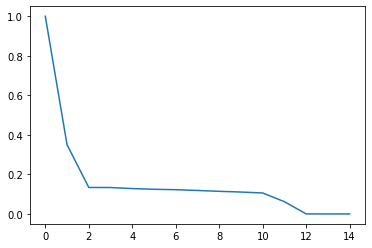

In [9]:
import matplotlib.pyplot as plt
norm = [float(i)/max(call_back.losses) for i in call_back.losses]
plt.plot(norm)

In [10]:
norm

[1.0,
 0.35016847983055743,
 0.13382216739320096,
 0.13355364450046756,
 0.1281993069751023,
 0.1246373112484822,
 0.12249584491049112,
 0.11866846079961312,
 0.11427343213005524,
 0.11069561459874933,
 0.10586832228419096,
 0.06182340328511415,
 0.0,
 0.0,
 0.0]

In [ ]:
model.wv.most_similar('Nam')

In [ ]:
vec = (model.wv['vua'] - model.wv['nam'] + model.wv['nữ'])
model.wv.most_similar([vec])


5

In [12]:
len(sents)

15000000

['Chây_ì', 'nộp', 'phạt', 'nguội']

In [14]:

update_model = gensim.models.Word2Vec.load("data/vectors-sg/vi-300-5-30000-10-fullsplit2-sg-testtoken.model")

In [20]:
update_model.wv.most_similar('chó')

[('mèo', 0.7492592334747314),
 ('Chó', 0.7168154716491699),
 ('cún', 0.6347182989120483),
 ('chú', 0.6181309223175049),
 ('khỉ', 0.6150009036064148),
 ('trăn', 0.6085225939750671),
 ('rọ_mõm', 0.5838047862052917),
 ('rông', 0.557949423789978),
 ('cá_sấu', 0.5469785332679749),
 ('vịt', 0.5453919768333435)]

In [16]:
vec = (update_model.wv['vua'] - update_model.wv['nam'] + update_model.wv['nữ'])
update_model.wv.most_similar([vec])

[('vua', 0.821650505065918),
 ('Vua', 0.7076741456985474),
 ('hoàng_hậu', 0.5978623628616333),
 ('hoàng', 0.5785622596740723),
 ('Hoàng_hậu', 0.561822235584259),
 ('nhà_vua', 0.5612842440605164),
 ('Gia_Long', 0.5431501865386963),
 ('phi_tần', 0.5358005166053772),
 ('thái_hậu', 0.5309587717056274),
 ('chúa', 0.5147391557693481)]

In [5]:
print ("Making update sentences as list...")
update_sents = []
with codecs.open('data/corpus/corpus-split-8-2.txt', 'r', 'utf-8-sig') as fin:
    while 1:
        line = fin.readline()
        line = re.sub(pattern, '', line)
        if not line: break

        words = ViTokenizer.tokenize(line)
        words = words.split()
        update_sents.append(words)
        
print ("Done update making sentence list")

Making update sentences as list...
Done update making sentence list


In [6]:
update_model.build_vocab(update_sents, update  = True)

In [12]:
update_model.corpus_count

15000000

In [15]:
call_back = callback()

print ("Update word vectors...")  
update_model.train(update_sents, total_examples = update_model.corpus_count,
                   callbacks=[call_back],
                   compute_loss = True,
                   epochs = update_model.epochs
                  )

#update_model.wv.save_word2vec_format('data/vectors-sg/update_model-split23.vec')
#update_model.save('data/vectors-sg/update_model-split23.model')

Update word vectors...
Loss after epoch 0: 88407584.0
Loss after epoch 1: 25412568.0
Loss after epoch 2: 20397576.0
Loss after epoch 3: 0.0
Loss after epoch 4: 0.0


In [30]:
update_model.wv.save_word2vec_format('data/vectors-sg/{}-{}-{}-{}-{}-fullsplit23-sg-token.vec'.format(lcode, vector_size, window_size, vocab_size, num_negative), binary=False)


with codecs.open('data/vectors-sg/{}-{}-{}-{}-{}-fullsplit23-sg-token.tsv'.format(lcode, vector_size, window_size, vocab_size, num_negative), 'w', 'utf-8') as fout:
    for i, word in enumerate(update_model.wv.index2word):
        fout.write(u"{}{}\n".format(word.encode('utf8').decode('utf8'),
                                          np.array_str(update_model[word])[1:-1]
                                          ))

update_model.save('data/vectors-sg/{}-{}-{}-{}-{}-fullsplit23-sg-token.model'.format(lcode, vector_size, window_size, vocab_size, num_negative))

C:\Users\lego2\anaconda3\envs\python36-clone-GUI\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


36593

In [19]:
len(update_sents)

1000000